n,x,y
<int>,<dbl>,<dbl>
1,103,38.8
2,107,38.5
3,110,39.3
4,112,40.0
5,113,41.0
6,115,39.7
7,116,40.6
8,117,40.7
9,120,39.4


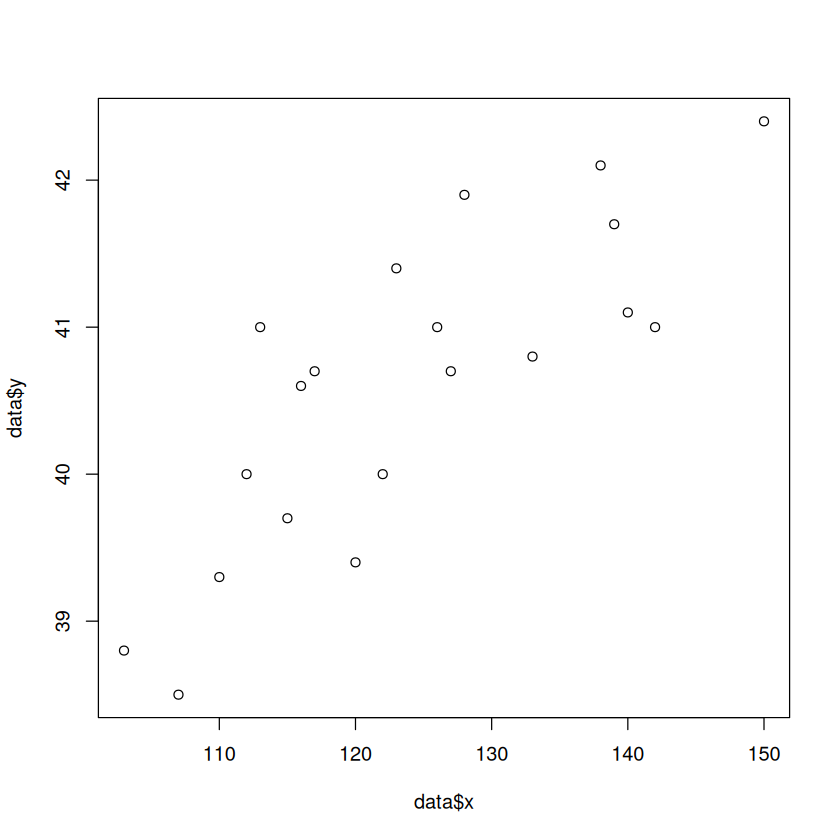

In [1]:
# Я не знаю как назывались перменные в изначальном файле, из за проблем с кодировкой. 
# Я переименовал их в x,y
R_sqare_vector <- c()
A_vector <- c()
data <- read.csv("./Data/Non_lin.csv",sep=";")
data$x <- as.numeric(gsub(",", ".", data$x))
data$y <- as.numeric(gsub(",", ".", data$y))
data
plot(data$y~data$x)

# Часть 1

$$y_{i} = a + b\,x_{i} ​+ ε_{i}​, \quad ε_{i}​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [2]:
summary(lm(data$y~data$x))


Call:
lm(formula = data$y ~ data$x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95855 -0.42189 -0.02662  0.54146  1.13801 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.26384    1.44266  22.364 1.39e-14 ***
data$x       0.06724    0.01157   5.812 1.66e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6538 on 18 degrees of freedom
Multiple R-squared:  0.6523,	Adjusted R-squared:  0.633 
F-statistic: 33.78 on 1 and 18 DF,  p-value: 1.661e-05


Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [3]:
summary(lm(data$y~data$x))$r.squared 

[1] 0.6523492

Ошибка аппроксимации
$$ A = \frac{1}{n}\, \sum{|{\frac{y_{i} - \hat{y}_{i} }{y_i}  } | } \times 100\%$$

In [4]:
#?lm() Не вижу ошибку апроксимации

In [5]:
A <- (1/max(data$n)) * sum(abs( data$y - lm(data$y~data$x)$fitted.values ) / data$y)
A

[1] 0.01309222

In [6]:
R_sqare_vector <- c(R_sqare_vector,summary(lm(data$y~data$x))$r.squared)
A_vector <- c(A_vector, A)

# Часть 2

$$y_{i} = a\,x_{i}^{b}\,ε_{i}​, \quad ln(ε_{i})​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [7]:
x <- data$x
y <- data$y

In [8]:
x <- log(x)
y <- log(y)

In [9]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0239016 -0.0109865 -0.0006673  0.0130982  0.0285137 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.69331    0.16916  15.922 4.73e-12 ***
x            0.20979    0.03512   5.974 1.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01588 on 18 degrees of freedom
Multiple R-squared:  0.6647,	Adjusted R-squared:  0.6461 
F-statistic: 35.68 on 1 and 18 DF,  p-value: 1.19e-05


Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [10]:
summary(lm(y~x))$r.squared 

[1] 0.664703

Ошибка аппроксимации
$$ A = \frac{1}{n}\, \sum{|{\frac{y_{i} - \hat{y}_{i} }{y_i}  } | } \times 100\%$$

In [11]:
x <- data$x
y <- data$y
A <- (1/max(data$n)) * sum(abs(y - lm(y~x)$fitted.values ) / y)
A

[1] 0.01309222

In [12]:
R_sqare_vector <- c(R_sqare_vector, summary(lm(y~x))$r.squared)
A_vector <- c(A_vector, A)

# Часть 3

$$y_{i} = a\,e^{b\,x_{i}}\,ε_{i}​, \quad ln(ε_{i})​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [13]:
x <- data$x
y <- data$y

In [14]:
y <- log(y)

In [15]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0245779 -0.0104467 -0.0008648  0.0133899  0.0283708 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.497525   0.035790  97.723  < 2e-16 ***
x           0.001661   0.000287   5.786 1.75e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01622 on 18 degrees of freedom
Multiple R-squared:  0.6504,	Adjusted R-squared:  0.6309 
F-statistic: 33.48 on 1 and 18 DF,  p-value: 1.751e-05


Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [16]:
summary(lm(y~x))$r.squared 

[1] 0.6503619

Ошибка аппроксимации
$$ A = \frac{1}{n}\, \sum{|{\frac{y_{i} - \hat{y}_{i} }{y_i}  } | } \times 100\%$$

In [17]:
y <- data$y
A <- (1/max(data$n)) * sum(abs(y - lm(y~x)$fitted.values ) / y)
A

[1] 0.01309222

In [18]:
R_sqare_vector <- c(R_sqare_vector, summary(lm(y~x))$r.squared)
A_vector <- c(A_vector, A)

# Часть 4

$$y_{i} = a+\,b\,ln(x_{i})\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [19]:
x <- data$x
y <- data$y

Почему не работает, если передатвать 
``` R
x <- data$x
y <- data$y
x <- log(x)
lm(y~x)
```
Но работает при 
``` R
x <- data$x
y <- data$y
lm(y~log(x))
```

In [20]:
summary(lm(y~log(x)))


Call:
lm(formula = y ~ log(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96684 -0.45670 -0.03124  0.52740  1.14331 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.269      6.826  -0.039    0.969    
log(x)         8.488      1.417   5.989 1.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6409 on 18 degrees of freedom
Multiple R-squared:  0.6659,	Adjusted R-squared:  0.6473 
F-statistic: 35.87 on 1 and 18 DF,  p-value: 1.152e-05


*Intercept* не значимый

In [21]:
summary(lm(y~log(x)-1))


Call:
lm(formula = y ~ log(x) - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96853 -0.45385 -0.02724  0.52424  1.13827 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
log(x)  8.43208    0.02896   291.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6238 on 19 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 8.477e+04 on 1 and 19 DF,  p-value: < 2.2e-16


Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [22]:
RSS <- sum((y- lm(y~log(x)-1)$fitted.values)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
R_2

[1] 0.6658584

Ошибка аппроксимации
$$ A = \frac{1}{n}\, \sum{|{\frac{y_{i} - \hat{y}_{i} }{y_i}  } | } \times 100\%$$

In [23]:
A <- (1/max(data$n)) * sum(abs(y-lm(y~log(x))$fitted.values)/y)
A

[1] 0.01289962

In [24]:
R_sqare_vector <- c(R_sqare_vector, R_2)
A_vector <- c(A_vector, A)

# Часть 5

Параболическая

$$y_{i} = a+\, \frac{b}{x_{i}}\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [25]:
x <- data$x
y <- data$y

In [26]:
x <- sqrt(x)

In [27]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9493 -0.4397 -0.0196  0.5347  1.1415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.7734     2.8547   8.328 1.38e-07 ***
x             1.5132     0.2563   5.904 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6471 on 18 degrees of freedom
Multiple R-squared:  0.6594,	Adjusted R-squared:  0.6405 
F-statistic: 34.85 on 1 and 18 DF,  p-value: 1.373e-05


Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [28]:
summary(lm(y~x))$r.squared 

[1] 0.659439

Ошибка аппроксимации
$$ A = \frac{1}{n}\, \sum{|{\frac{y_{i} - \hat{y}_{i} }{y_i}  } | } \times 100\%$$

In [29]:
A <- (1/max(data$n)) * sum(abs( y - lm(y~x)$fitted.values ) / y)
A

[1] 0.01299734

In [30]:
R_sqare_vector <- c(R_sqare_vector, summary(lm(y~x))$r.squared)
A_vector <- c(A_vector, A)

# Часть 6

$$y_{i} = a+\, \frac{b}{x_{i}}\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [31]:
x <- data$x
y <- data$y

In [32]:
x1 <- 1/x

In [33]:
summary(lm(y~x1))


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00461 -0.48757 -0.02951  0.50513  1.14195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    49.228      1.412  34.867  < 2e-16 ***
x1          -1058.760    172.498  -6.138 8.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6305 on 18 degrees of freedom
Multiple R-squared:  0.6767,	Adjusted R-squared:  0.6587 
F-statistic: 37.67 on 1 and 18 DF,  p-value: 8.509e-06


Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [34]:
summary(lm(y~x1))$r.squared 

[1] 0.6766829

Ошибка аппроксимации
$$ A = \frac{1}{n}\, \sum{|{\frac{y_{i} - \hat{y}_{i} }{y_i}  } | } \times 100\%$$

In [35]:
A <- (1/max(data$n)) * sum(abs( y - lm(y~x1)$fitted.values ) / y)
A

[1] 0.0126976

In [36]:
R_sqare_vector <- c(R_sqare_vector, summary(lm(y~x1))$r.squared)
A_vector <- c(A_vector, A)

# Анализ результатов

In [37]:
R_sqare_vector
A_vector

[1] 0.6523492 0.6523492 0.6523492 0.6658584 0.6594390 0.6766829

[1] 0.01309222 0.01309222 0.01309222 0.01289962 0.01299734 0.01269760

In [38]:
max(R_sqare_vector)
min(A_vector)

[1] 0.6766829

[1] 0.0126976

---

# Гиперболическая

In [39]:
x <- data$x
y <- data$y
x1 <- 1/x

In [40]:
summary(lm(y~x1))


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00461 -0.48757 -0.02951  0.50513  1.14195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    49.228      1.412  34.867  < 2e-16 ***
x1          -1058.760    172.498  -6.138 8.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6305 on 18 degrees of freedom
Multiple R-squared:  0.6767,	Adjusted R-squared:  0.6587 
F-statistic: 37.67 on 1 and 18 DF,  p-value: 8.509e-06


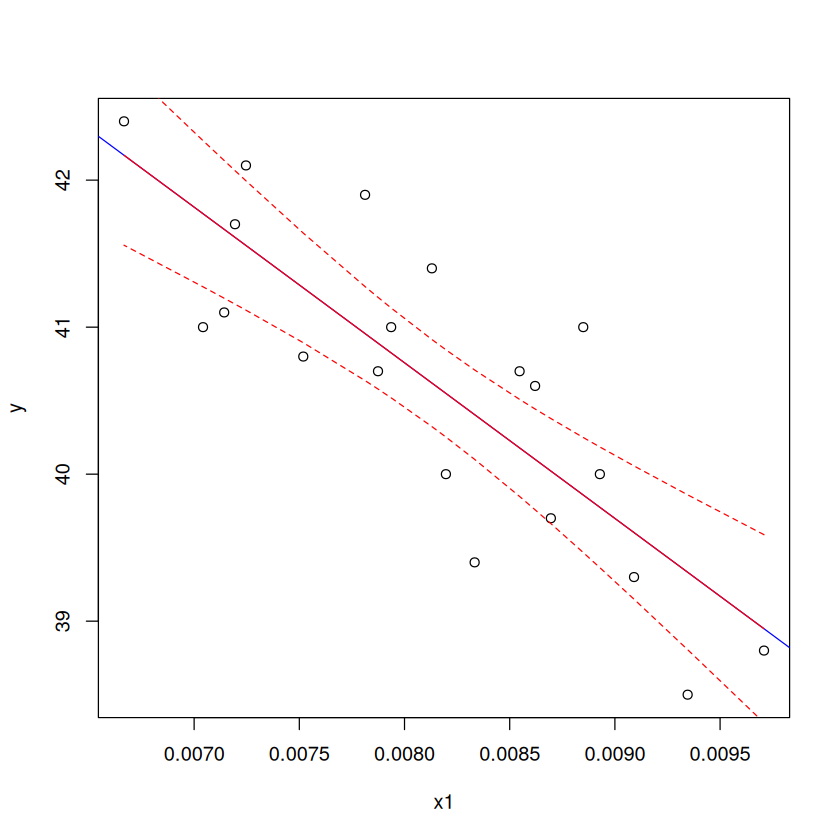

In [41]:
predictions <- predict(lm(y~x1), interval = "confidence", level = 0.95)
plot(y~x1)
abline(lm(y~x1), col = "blue") 
lines(x1, predictions[, "lwr"], col = "red", lty = 2)
lines(x1, predictions[, "upr"], col = "red", lty = 2)
lines(x1, lm(y~x1)$fitted.values,col="red")

## Логарифмическая

In [42]:
x <- data$x
y <- data$y

In [43]:
x <- log(x)


Call:
lm(formula = y ~ x - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96853 -0.45385 -0.02724  0.52424  1.13827 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  8.43208    0.02896   291.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6238 on 19 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 8.477e+04 on 1 and 19 DF,  p-value: < 2.2e-16


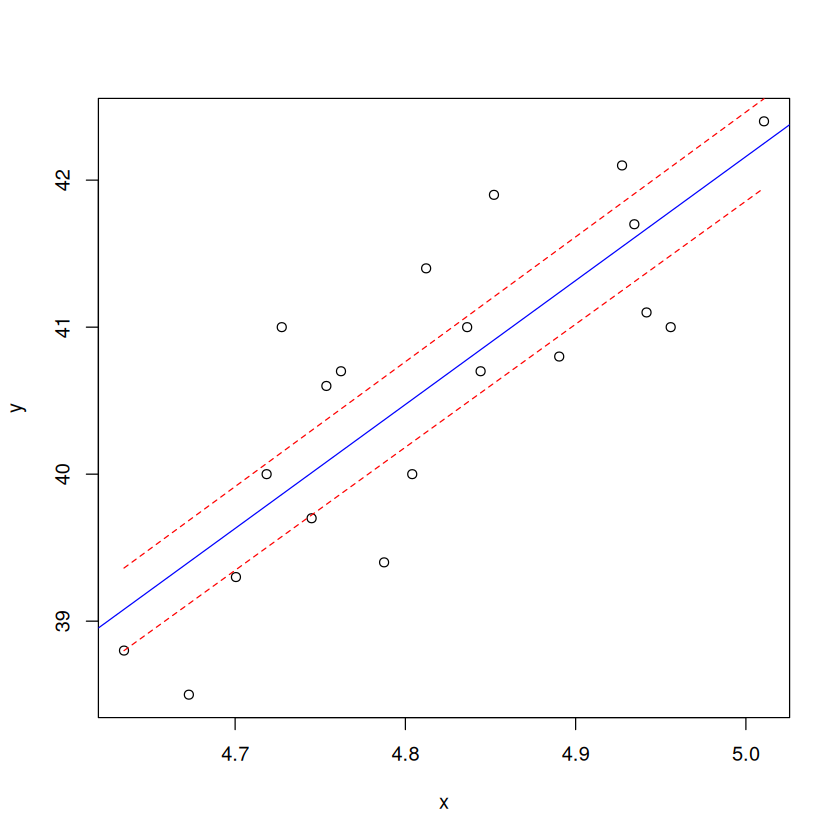

In [44]:
model <- lm(y ~ x - 1)
summary(model)
predictions <- predict(model, interval = "confidence", level = 0.95)
plot(x, y)
abline(model, col = "blue") 
lines(x, predictions[, "lwr"], col = "red", lty = 2)
lines(x, predictions[, "upr"], col = "red", lty = 2)

## Степенная

In [45]:
x <- log(data$x)
y <- log(data$y)


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0239016 -0.0109865 -0.0006673  0.0130982  0.0285137 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.69331    0.16916  15.922 4.73e-12 ***
x            0.20979    0.03512   5.974 1.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01588 on 18 degrees of freedom
Multiple R-squared:  0.6647,	Adjusted R-squared:  0.6461 
F-statistic: 35.68 on 1 and 18 DF,  p-value: 1.19e-05


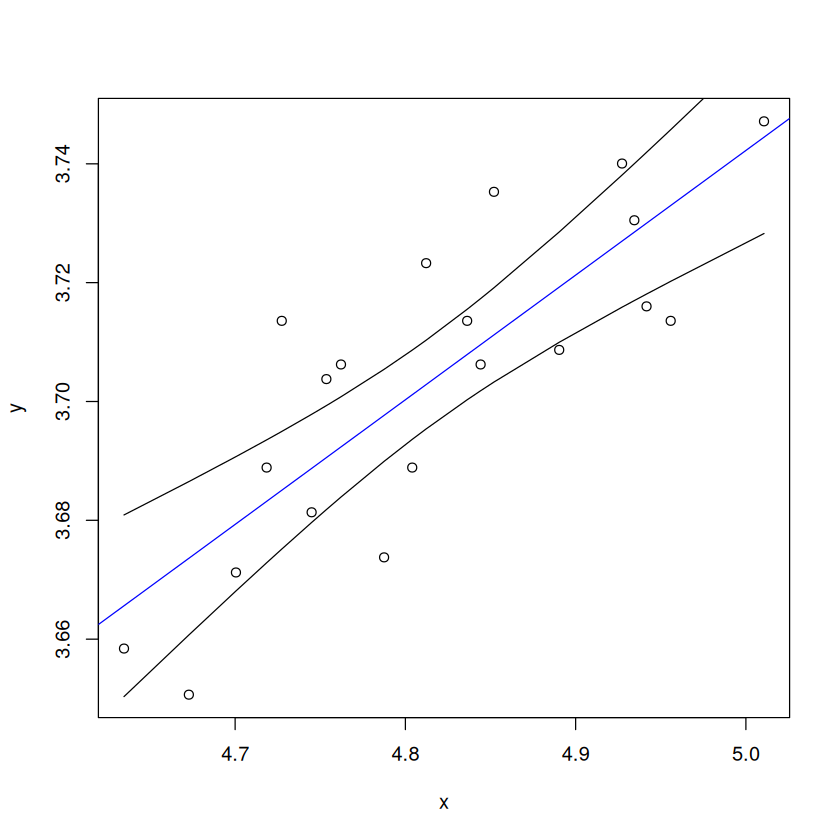

In [46]:
model <- lm(y ~ x)
summary(model)
predictions <- predict(model, interval = "confidence", level = 0.95)
plot(x, y)
abline(model, col = "blue") 
lines(x, predictions[, "lwr"])
lines(x, predictions[, "upr"])